<a href="https://colab.research.google.com/github/yamini542/Applied-AI/blob/main/AI_ASS_Tas1_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time-Series-prediction-task1
ime Series – Prediction Task
1. Heart rate prediction Sudden variations in heart rate could lead to the risks of stroke, heart failure, sudden cardiac arrest, 
and also death. Therefore, monitoring the heart rate is critical as it helps to discover the irregularities of the heart’s function to detect health problems. With the advancements in AI and stream processing 
technologies, more accurate future predictions also can be made, allowing healthcare sectors to detect and treat such situations at early stages.
In this task, you are given a time series collected using medical sensors, approximately four hours of 
data for a patient. 

Using these data, you need to build an effective time series model to predict the next twenty (20) observations (minutes) of heart rate data (Lifetouch Heart Rate). 

You can use any time series model.

In [ ]:
#importing necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown
!gdown 1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp

Downloading...
From: https://drive.google.com/uc?id=1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp
To: /content/PT_Train.csv
100% 7.17k/7.17k [00:00<00:00, 7.55MB/s]


In [ ]:
#loading the data set from the guthub link
df=pd.read_csv('PT_Train.csv')

In [ ]:
df.head()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [ ]:
# Check for missing values
print(df.isna().sum())



Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64


In [ ]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [ ]:
df.isnull().sum()

Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


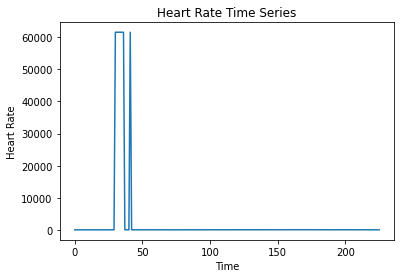

In [ ]:
import matplotlib.pyplot as plt

# create a line plot of the heart rate data
plt.plot(df['Lifetouch Heart Rate'])

# add labels and title
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Time Series')

# show the plot
plt.show()


In [ ]:
df.shape

(226, 5)

In [ ]:
# Handle missing values
#df = df.fillna(df.mean())
df=df.fillna(df.bfill())



In [ ]:
df.head(10)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,92.0,140.0
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0
5,17/08/2015 15:14,132,41,92.0,134.0
6,17/08/2015 15:15,132,47,92.0,135.0
7,17/08/2015 15:16,133,44,92.0,135.0
8,17/08/2015 15:17,136,45,94.0,136.0
9,17/08/2015 15:18,137,42,93.0,138.0


Data preprocessing for this dataset would involve a few steps:

1.Checking for missing or invalid data: In this dataset, some entries in the Oximeter SpO2 and Oximeter Pulse columns are missing or have a value of -1. These entries need to be handled appropriately, either by removing them or imputing them with a suitable value.

2.Handling outliers: The data point with a heart rate of 61441 and a respiration rate of 61441 is likely an error and should be removed.

Formatting the timestamp column: The timestamp column should be formatted as a datetime object, if it is not already.

Normalizing the data: The data in the different columns may have different ranges, which could cause problems during modeling. Normalizing the data, for example by scaling it to a range between 0 and 1, can help prevent this.

Splitting the dataset: Finally, the dataset should be split into training and testing sets, so that the model can be trained and evaluated on different data.

In [ ]:
#here we are replacing the negative values 
df1=df.replace(-1, np.nan, inplace=False)

In [ ]:
print(df.shape)
print(df1.shape)

(226, 5)
(226, 5)


In [ ]:
#Impute missing values with a suitable value (e.g. the mean)
df1["Oximeter SpO2"].fillna(df1["Oximeter SpO2"].mean(), inplace=True)
df1["Oximeter Pulse"].fillna(df1["Oximeter Pulse"].mean(), inplace=True)

In [ ]:
#handling-outliers: here for the heart rate we have consider the values which are between 40-200 as we know that 
df1 = df1[(df1['Lifetouch Heart Rate'] > 40) & (df1['Lifetouch Heart Rate'] < 200)]


In [ ]:
df1

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,92.000000,140.000000
1,17/08/2015 15:10,144,40,92.000000,140.000000
2,17/08/2015 15:11,140,42,89.000000,144.000000
3,17/08/2015 15:12,138,45,93.000000,141.000000
4,17/08/2015 15:13,133,42,94.000000,134.000000
...,...,...,...,...,...
221,17/08/2015 18:50,159,51,93.973684,143.010526
222,17/08/2015 18:51,151,64,93.973684,143.010526
223,17/08/2015 18:52,140,64,93.973684,143.010526
224,17/08/2015 18:53,140,55,93.973684,143.010526


In [ ]:
#pd.to_datetime() function to convert the timestamp column to a datetime object.
#formating the time stamp column
df1['Timestamp (GMT)'] = pd.to_datetime(df1['Timestamp (GMT)'])



In [ ]:
#normalizig the data
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the "Lifetouch Heart Rate" column
scaler.fit(df1[["Lifetouch Heart Rate"]])

# Transform the "Lifetouch Heart Rate" column
df1["Lifetouch Heart Rate"] = scaler.transform(df1[["Lifetouch Heart Rate"]])


#Model-1: ARIMA
Step1: checking for the stationarity
step2:


In [ ]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')
     

In [ ]:
check_stationarity(df1['Lifetouch Heart Rate'])


p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


note: A p-value less than or equal to 0.05 (typically 0.05) is statistically significant and suggests that the results are not due to chance. In this case, since the p-value is 0.1, it suggests that the series is stationary. 

In [ ]:
df1['Date'] = df1['Timestamp (GMT)'].dt.date
df1['Time'] = df1['Timestamp (GMT)'].dt.time


In [ ]:
df1

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Date,Time
0,2015-08-17 15:09:00,0.500000,41,92.000000,140.000000,2015-08-17,15:09:00
1,2015-08-17 15:10:00,0.575758,40,92.000000,140.000000,2015-08-17,15:10:00
2,2015-08-17 15:11:00,0.515152,42,89.000000,144.000000,2015-08-17,15:11:00
3,2015-08-17 15:12:00,0.484848,45,93.000000,141.000000,2015-08-17,15:12:00
4,2015-08-17 15:13:00,0.409091,42,94.000000,134.000000,2015-08-17,15:13:00
...,...,...,...,...,...,...,...
221,2015-08-17 18:50:00,0.803030,51,93.973684,143.010526,2015-08-17,18:50:00
222,2015-08-17 18:51:00,0.681818,64,93.973684,143.010526,2015-08-17,18:51:00
223,2015-08-17 18:52:00,0.515152,64,93.973684,143.010526,2015-08-17,18:52:00
224,2015-08-17 18:53:00,0.515152,55,93.973684,143.010526,2015-08-17,18:53:00


In [ ]:
df1 = df1.drop('Timestamp (GMT)', axis=1)



In [ ]:
df1

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Date,Time
0,0.500000,41,92.000000,140.000000,2015-08-17,15:09:00
1,0.575758,40,92.000000,140.000000,2015-08-17,15:10:00
2,0.515152,42,89.000000,144.000000,2015-08-17,15:11:00
3,0.484848,45,93.000000,141.000000,2015-08-17,15:12:00
4,0.409091,42,94.000000,134.000000,2015-08-17,15:13:00
...,...,...,...,...,...,...
221,0.803030,51,93.973684,143.010526,2015-08-17,18:50:00
222,0.681818,64,93.973684,143.010526,2015-08-17,18:51:00
223,0.515152,64,93.973684,143.010526,2015-08-17,18:52:00
224,0.515152,55,93.973684,143.010526,2015-08-17,18:53:00


In [ ]:
df1.shape

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a testing set
train_df1, test_df1 = train_test_split(df1, test_size=0.2)

In [ ]:
# Import the necessary libraries
from statsmodels.tsa.arima_model import ARIMA

# Set the parameters for the model: p, d, and q
p = 2 # the number of lag observations
d = 1 # the degree of differencing
q = 0 # the size of the moving average window

# Fit the ARIMA model to your data
model = ARIMA(train_df1, order=(p, d, q))
model_fit = model.fit()
